Experiment 22 - SVD Analysis 

In [6]:
import sys
sys.path.insert(0, '../../')
import numpy as np
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP
import matplotlib.pyplot as plt

In [7]:
def train(alpha, bw, shift, method="linear"):
    width = 256
    height = 1
    npcs = 16
    TRs = [5e-3, 10e-3, 20e-3]
    alpha = np.deg2rad(alpha)
    gradient = 2 * np.pi
    phantom_type = 'line'
    phantom_padding = 32

    D = responses.gaussian(width, bw=bw, shift=shift)
    M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=phantom_padding)
    print(f'size: {M.shape}:{D.shape}')
    Ic, An = simulation.train_gasp(M, D, clines=2, method=method)
    An = np.array(An)[0]
    return Ic, An, M

In [8]:
def train_and_plot(alpha = 20, bw = 0.2, shift = 0, method='linear'):
    Ic, An, Mtrain = train(alpha=alpha, bw=bw, shift=shift, method=method)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

    _ = np.sqrt(np.sum(np.abs(Mtrain)**2, axis=2))
    _ = abs(_[:,:,0,0])
    print(_.shape)
    ax1.plot(_.T)

    _ = np.abs(Ic)
    print(_.shape)
    ax2.plot(_.T)

    return An

In [9]:
def create_gasp_data(alpha = 20):
        width = 256
        height = 1
        npcs = 16
        TRs = [5e-3, 10e-3, 20e-3]
        alpha = np.deg2rad(alpha)
        gradient = 2 * np.pi
        phantom_type = 'line'
        phantom_padding = 32
        
        M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=phantom_padding)
        return M
        
def run_gasp(Mdata, An, method="linear"):
    Ic = []
    for cc in range(Mdata.shape[2]):
        Mc = Mdata[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[1], -1))
        _ = GASP.apply_gasp(Mc, An, method=method)
        Ic.append(_)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

def plot_gasp(Ic):
    plt.plot(np.abs(Ic))
    plt.show()

size: (1, 256, 1, 16, 3):(256,)
(1, 256)
(1, 256)


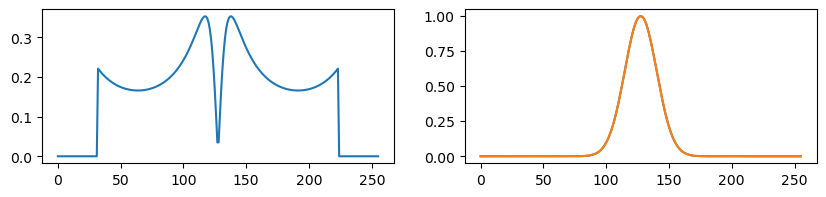

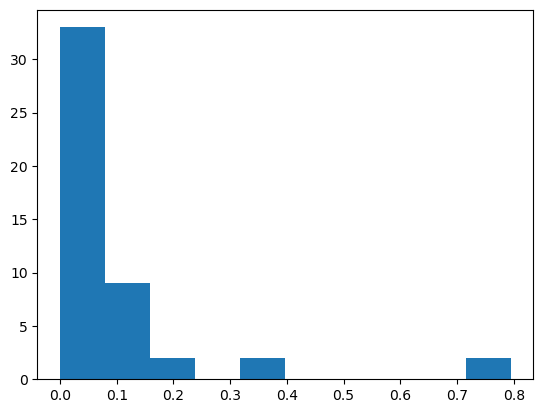

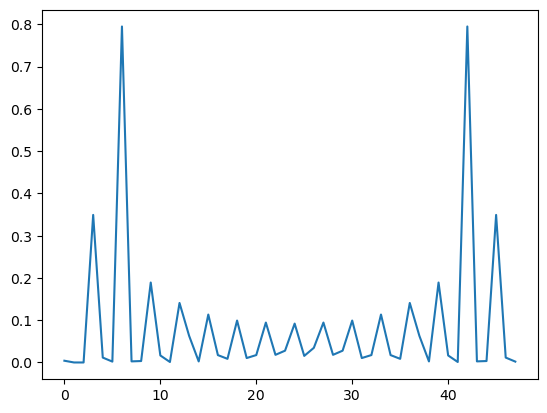

array([4.16888023e-03, 5.20649372e-05, 2.41206914e-05, 3.49212523e-01,
       1.16225377e-02, 2.09507246e-03, 7.95105443e-01, 2.62346453e-03,
       3.43685497e-03, 1.89208429e-01, 1.66469053e-02, 1.16971508e-03,
       1.40879782e-01, 6.31417654e-02, 2.48174667e-03, 1.13449211e-01,
       1.74812821e-02, 8.64464759e-03, 9.92255121e-02, 1.05131490e-02,
       1.75583413e-02, 9.44739925e-02, 1.81126383e-02, 2.79394920e-02,
       9.19973245e-02, 1.55841169e-02, 3.46813917e-02, 9.44739925e-02,
       1.81126383e-02, 2.79394920e-02, 9.92255121e-02, 1.05131490e-02,
       1.75583413e-02, 1.13449211e-01, 1.74812821e-02, 8.64464759e-03,
       1.40879782e-01, 6.31417654e-02, 2.48174667e-03, 1.89208429e-01,
       1.66469053e-02, 1.16971508e-03, 7.95105443e-01, 2.62346453e-03,
       3.43685497e-03, 3.49212523e-01, 1.16225377e-02, 2.09507246e-03])

In [10]:
An = train_and_plot()
M = create_gasp_data(20)
Ic = run_gasp(M, An, 'linear')
plot_gasp(Ic[0])


plt.figure()
plt.hist(abs(An))
plt.show()
plt.figure()
plt.plot(abs(An))
plt.show()
np.abs(An)